# > bigscape v0.0.1

`Authorship: TFL, 180720-180726`

**Installing Conda Packages**

```
conda install -c anaconda biopython
conda install -c rdkit rdkit
conda install -c https://conda.anaconda.org/biocore scikit-bio
```

**Importing General Dependencies**

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import time
# import re
from collections import Counter
import subprocess
# from Bio import SeqIO
# import itertools
# from rdkit import Chem
# %matplotlib inline

**Setting Root Directory**

In [2]:
folder_list = ["/home/gerwick-lab/Desktop/data/genomes/antiSMASH/cyanobiome_alexey_antismash_3.0.5.1/",
               "/home/gerwick-lab/Desktop/data/genomes/antiSMASH/ncbi_cyano_alexey_antismash_3.0.5.1/",
               "/home/gerwick-lab/Desktop/data/genomes/antiSMASH/complete_genomes/"]

In [18]:
root = "/home/tiago/Desktop/cyanet/"
root

'/home/tiago/Desktop/cyanet/'

**Downloading [MIBiG](http://mibig.secondarymetabolites.org/) and parsing antiSMASH files**

In [4]:
from cyanotools1.bigscape import parsing_antismash

bigscape_inputs = os.path.join(root,"bigscape","pnas-inputs")
parsing_antismash(bigscape_inputs,folder_list)

Parsing BGCs from folder /home/gerwick-lab/Desktop/data/genomes/antiSMASH/cyanobiome_alexey_antismash_3.0.5.1/
Parsing BGCs from folder /home/gerwick-lab/Desktop/data/genomes/antiSMASH/ncbi_cyano_alexey_antismash_3.0.5.1/
Parsing BGCs from folder /home/gerwick-lab/Desktop/data/genomes/antiSMASH/complete_genomes/

--- 3 minutes ---


In [5]:
ls ./bigscape/pnas-inputs/

1A2_001.gbk  3F7_006.gbk     ANNX02_031.gbk  BGC0001098.gbk    JNBA01_014.gbk
1A2_002.gbk  3F7_007.gbk     ANNX02_032.gbk  BGC0001099.gbk    JNBA01_015.gbk
1A2_003.gbk  3F7_008.gbk     ANNX02_033.gbk  BGC0001100.gbk    JNBA01_016.gbk
1A2_004.gbk  3F7_009.gbk     ANNX02_034.gbk  BGC0001101.gbk    JNBA01_017.gbk
1A2_005.gbk  3F7_010.gbk     ANNX02_035.gbk  BGC0001102.gbk    JNBA01_018.gbk
1A2_006.gbk  3F7_011.gbk     AOCI01_001.gbk  BGC0001103.gbk    JNBB01_001.gbk
1A2_007.gbk  3F7_012.gbk     AOCI01_002.gbk  BGC0001104.gbk    JNBB01_002.gbk
1A2_008.gbk  3F7_013.gbk     AOCI01_003.gbk  BGC0001105.gbk    JNBB01_003.gbk
1A2_009.gbk  3F7_014.gbk     AOCI01_004.gbk  BGC0001106.gbk    JNBB01_004.gbk
1A2_010.gbk  3F7_015.gbk     AOCI01_005.gbk  BGC0001107.gbk    JNBB01_005.gbk
1A2_011.gbk  3F7_016.gbk     AOCI01_006.gbk  BGC0001108.gbk    JNBB01_006.gbk
1A2_012.gbk  3F7_017.gbk     AOCI01_007.gbk  BGC0001109.gbk    JNBB01_007.gbk
1A2_013.gbk  3F7_018.gbk     AOCI01_008.gbk  BGC0001110.gbk    J

**Installing BiG-SCAPE**
```
cd ./bigscape/
git clone https://git.wur.nl/medema-group/BiG-SCAPE.git
cd ./bigscape/BiG-SCAPE/
wget ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam31.0/Pfam-A.hmm.gz
gzip -d Pfam-A.hmm.gz
hmmpress Pfam-A.hmm
pip install pysapc
```

In [ ]:
from pysapc import tests
tests.testDense()
tests.testSparse()

**Networking parsed BGCs**

BiG-SCAPE requires only genbank (.gbk) files as input, now properly named and stored at the folder `root/big-scape/inputs`. BiG-SCAPE will calculate the similarity between every and each pair of BGCs in the dataset.

In [6]:
def run_big_scape(bigscape_inputs,output_folder,pfam_path):
    bigscape_cmd = "python ./bigscape.py -i %s -o %s -c 12 --include_singletons --pfam_dir %s"%(bigscape_inputs,output_folder,pfam_path)
#     p = subprocess.Popen(bigscape_cmd, shell=True, stdin=subprocess.PIPE, stdout=subprocess.PIPE,
#                          stderr=subprocess.STDOUT, close_fds=True,cwd=os.path.join(root,"bigscape","BiG-SCAPE"))
#     output = p.stdout.read()
#     print output
    print bigscape_cmd

def main_bigscape(output_folder,pfam_path):
    start_time = time.time()
    bigscape_inputs = os.path.join(root,"bigscape","pnas-inputs")
    if os.path.exists(output_folder):
        print("BiG-SCAPE output already exists")
    else:
        subprocess.call("mkdir -p %s"%(output_folder),shell=True)
        run_big_scape(bigscape_inputs,output_folder,pfam_path)
        print('\n' + "--- %d minutes ---" %((time.time()-start_time)/60))

main_bigscape(os.path.join(root,"bigscape","output_all-2"),os.path.join(root,"bigscape"))

python ./bigscape.py -i /home/tiago/Desktop/cyanet/bigscape/pnas-inputs -o /home/tiago/Desktop/cyanet/bigscape/output_all-2 -c 12 --include_singletons --pfam_dir /home/tiago/Desktop/cyanet/bigscape

--- 0 minutes ---


**Concatenating BiG-SCAPE Scores for Different Types of BGCs**

Since BiG-SCAPE has a type specific scoring system according to the biosynthetic route of the queried BGCs (e.g. NRPS, PKS, RiPP...), we are going to concatenate all separated results into a single output file here named `bigscape_all_c080.txt`. PS: since we are not selecting a particular cutoff here, we are concatenating results from the least stringent cutoff (0.80)

In [20]:
from cyanotools1.bigscape import concat_bigscape

concat_bigscape(os.path.join(root,"bigscape","output_all-2"),"bigscape_all_c080.txt")

!head ./bigscape/output_all-2/bigscape_all_c080.txt

Clustername 1	Clustername 2	Raw distance	Squared similarity	Jaccard index	DDS index	Adjacency index	raw DDS non-anchor	raw DDS anchor	Non-anchor domains	Anchor domains	Combined group	Shared group
1C4_003	2G6_009	0.60441172123	0.15649010241	0.818181812763	0.290201961994	0.769230782986	0.741153359413	0.647087335587	12	6	nrps-t1pks - nrps-t1pks	nrps-t1pks
AVFV01_008	CAIJ01_006	0.537252485752	0.214135244489	0.666666686535	0.435649126768	0.558823525906	0.550547480583	0.588506877422	42	24	t1pks-nrps - t1pks-nrps	t1pks-nrps
AVFU01_007	CAIK01_003	0.64940404892	0.12291752547	0.301886796951	0.368392258883	0.28749999404	0.721938431263	0.262430220842	94	23	nrps-t1pks - t1pks-nrps	
1F9_001	1H2_001	0.0835400223732	0.839898884296	0.9375	0.923117220402	0.892857134342	0.0826752781868	0.0143241491169	54	5	nrps-t1pks - nrps-t1pks	nrps-t1pks
2H1_034	2I9_005	0.765908896923	0.0547986589372	0.441176474094	0.207809150219	0.327272713184	0.821294426918	0.706959009171	82	28	nrps-t1pks-otherks - t1pks-nrps	
AJLJ0

**Generating Denoised Network**

In [21]:
from cyanotools1.bigscape import main_dbscan

cutoff = 0.6

gcf_patterns1,binary_patterns1 = main_dbscan("./bigscape/output_all-2/bigscape_all_c080.txt",cutoff,binary=True)

Matrix for GCFs saved as ./bigscape/output_all-2/gcf_map_0.6.txt
Matrix for GCFs saved as ./bigscape/output_all-2/gcf_map_binary_0.6.txt

--- 2 minutes ---


**Estimating Beta-diversity Scores for the Selected Cutoff(s)**

In [4]:
gcf_df = pd.read_csv('./bigscape/output_all-2/gcf_map_binary_0.6.txt', sep='\t')

input_list = glob.glob("./genomics_pnas/outputs/final_scaffolds/*.fasta")
genome_list = []

for item in input_list:
    genomeID = os.path.basename(item).split(".")[0][3:]
    if genomeID in gcf_df.columns:
        genome_list.append(genomeID)

In [5]:
for item in gcf_df.columns:
    if len(item) > 3:
        genome_list.append(item)

In [6]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
import seaborn as sns
from skbio.diversity import beta_diversity
import matplotlib.pyplot as plt
sns.set()
#sns.set_context("talk")
%matplotlib inline

gcf_subset = gcf_df[genome_list]
header = list(gcf_subset.columns.values)
gcf_subset.index.names = ['GCFs']

ids = gcf_subset.columns.astype(str).tolist()
data = gcf_subset.as_matrix()
data = data.transpose()
data = data.astype(int)

bc_dm = beta_diversity("jaccard", data, ids)
bc_dm_df = bc_dm.to_data_frame()

/home/tiago/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


DissimilarityMatrixError: IDs must be unique. Found the following duplicate IDs: 'ISBB', 'ASIH'

**Plotting Pairwise Beta-diversity Comparison across Samples**

Brays-Curtis Similarity (0.0-1.0):


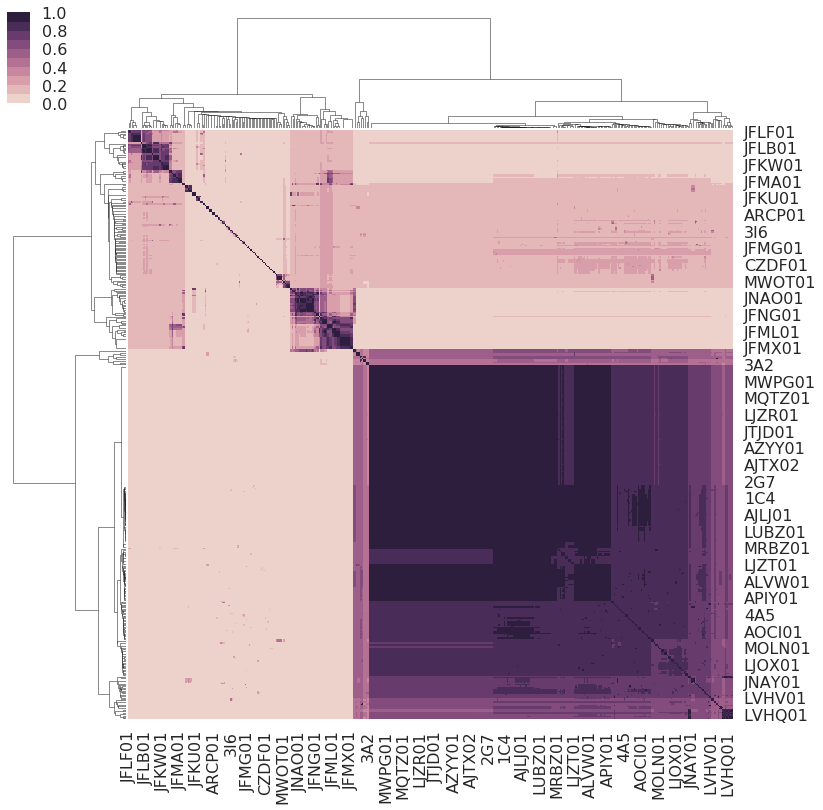

In [27]:
sns.set_context("poster")

correlations = bc_dm_df.corr()
correlations_array = np.asarray(bc_dm_df.corr())

row_linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(distance.pdist(correlations_array.T), method='average')

palette = sns.cubehelix_palette(10)

sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage,
               figsize=(13, 13),standard_scale=1,cmap=palette)

print"Brays-Curtis Similarity (0.0-1.0):"

# plt.savefig("./big-scape/outputs/beta-diversity_%s.png"%(int(cutoff*10)),format="png")

**Obtaining and Plotting Average Beta-diversity for Each Sample**

/home/tiago/anaconda2/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


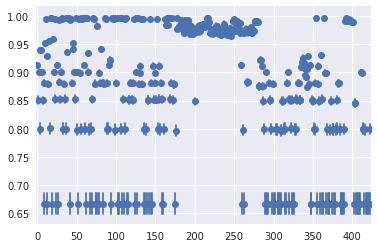

In [28]:
sns.set(color_codes=True)

fig = plt.figure()
diversity_scores = {}
matrix_data = []

for i,r in bc_dm_df.iterrows():
    diversity_scores[i] = np.average(bc_dm_df[i]),np.std(bc_dm_df[i])
    matrix_data.append(r.values.tolist())

ax = sns.tsplot(data=matrix_data, err_style="ci_bars", interpolate=False)
# plt.savefig("./big-scape/outputs/tsplot_%s.png"%(int(cutoff*10)), format='png')

**Plotting PCoA for  Beta-diversity Comparison across Samples**

In [29]:
most_promising_color = {}
most_promising_strains = []

count = 0

for key,value in diversity_scores.iteritems():
    if value[0] >= 0.95:
        most_promising_color[key] = {"diversity":"big_producer", "subject":"high"}
        count += 1
        most_promising_strains.append(key)
    else:
        most_promising_color[key] = {"diversity":"small_producer", "subject":"low"}
        count += 1
            
sample_md = pd.DataFrame.from_dict(most_promising_color, orient='index')

sample_md

,diversity,subject
1A2,big_producer,high
1A3,small_producer,low
1A7,big_producer,high
1B1,small_producer,low
1B6,big_producer,high
1C2,small_producer,low
1C4,small_producer,low
1D4,small_producer,low
1D8,small_producer,low
1D9,big_producer,high


In [30]:
from skbio.stats.ordination import pcoa

bc_pc = pcoa(bc_dm)

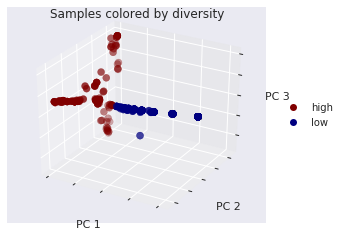

In [31]:
fig = bc_pc.plot(sample_md, 'subject', axis_labels=('PC 1', 'PC 2', 'PC 3'),
                 title='Samples colored by diversity', cmap='jet', s=50)

**Identifying Most Promising Samples**

In [32]:
taxa_df = pd.read_csv('cyanobiome/mash-Linux64-v2.0/mash_taxonomy_2.csv',sep=',',header=None)

taxa_dict = pd.Series(taxa_df[1].values,index=taxa_df[0]).to_dict()

taxa_list = []

for item in most_promising_strains:
    if item in taxa_dict:
        print item, taxa_dict[item],diversity_scores[item]
        taxa_list.append(taxa_dict[item])

AVFY01 Planktothrix (0.9945464585205152, 0.05961511222490471)
JFLU01 Prochlorococcus (0.9839229559748428, 0.09199650969397942)
MWOU01 Prochlorococcus (0.9931210691823898, 0.06451302841221725)
CVSZ01 Prochlorococcus (0.9846698113207547, 0.07423294678533242)
JFLC01 Prochlorococcus (0.9787735849056604, 0.12238422456239918)
JFND01 Prochlorococcus (0.9870283018867925, 0.08151780320172736)
CZCS01 Planktothrix (0.9964622641509434, 0.05418115569651041)
ALVK01 Pseudanabaena (0.9964622641509434, 0.05418115569651048)
JNAW01 Prochlorococcus (0.9913241239892183, 0.07818413286921738)
MWOV01 Prochlorococcus (0.9921383647798742, 0.06798837408207346)
1F9 Okeania (0.9952167133181284, 0.05226209817087092)
JFLP01 Prochlorococcus (0.9734669811320755, 0.12810711892879603)
JFKV01 Prochlorococcus (0.9775943396226415, 0.11470648446370918)
AATZ01 Synechococcus (0.9952380952380953, 0.053691838325388014)
CVSY01 Prochlorococcus (0.9968553459119497, 0.05109458116123188)
JFMM01 Prochlorococcus (0.9694575471698114, 0

In [33]:
c = Counter(taxa_list)

c

Counter({'Anabaena': 1,
         'Cyanobacteria': 1,
         'Cyanothece': 2,
         'Filamentous': 1,
         'Fischerella': 1,
         'Kamptonema': 1,
         'Microcystis': 4,
         'Moorea': 9,
         'Nodosilinea': 1,
         'Nodularia': 1,
         'Okeania': 8,
         'Oscillatoria': 1,
         'Oscillatoriales': 1,
         'Planktothrix': 6,
         'Prochlorococcus': 113,
         'Pseudanabaena': 1,
         'Psychrobacter': 1,
         'Scytonema': 1,
         'Spirulina': 1,
         'Symploca': 2,
         'Synechococcus': 3,
         'Synechocystis': 1,
         'Xenococcus': 1})

**Counting number of BGCs analyzed**

In [8]:
gcf_df2 = pd.read_csv('./bigscape/output_all-2/gcf_map_0.6.txt', sep='\t')

gcf_df2 = gcf_df2[genome_list]

bgc_count = 0

for i,r in gcf_df2.iterrows():
    for item in list(gcf_df2.loc[i]):
        if item != "0":
            bgc_count += len(item.split(","))
            
bgc_count

1935

In [36]:
rarefac_list = []

for col in gcf_subset.columns:
    rarefac_list.append(gcf_df[col].sum())

In [37]:
from skbio.diversity.alpha import michaelis_menten_fit

michaelis_menten_fit(rarefac_list, num_repeats=1, params_guess=None)

668.5882666743762